In [2]:
from mnist import load_mnist

In [3]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [4]:
train[0].shape, train[1].shape

((55000, 28, 28, 1), (55000,))

In [5]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Number 8')

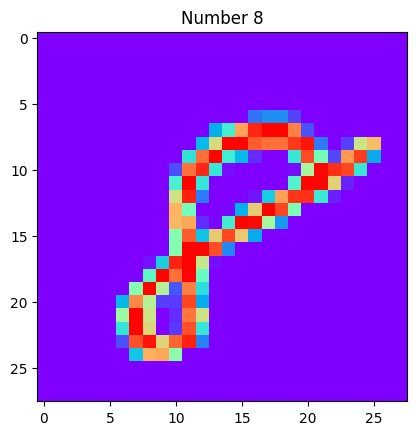

In [16]:
plt.imshow(train[0][55000-1], cmap = 'rainbow')
plt.title('Number ' + str(train[1][55000-1]))

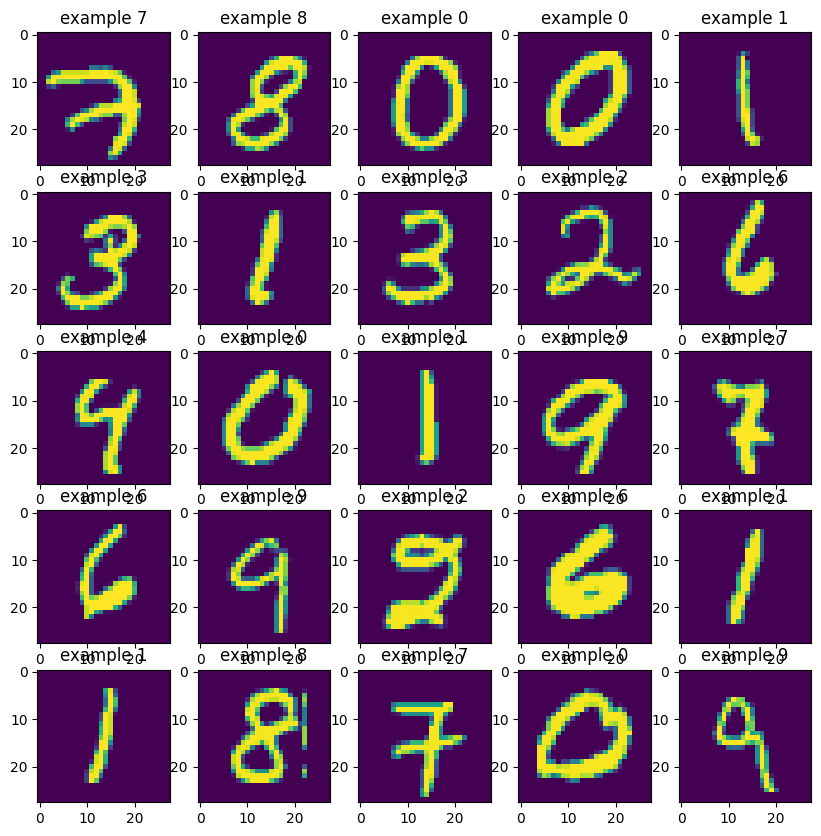

In [17]:
fig, axs = plt.subplots(5, 5, figsize = (10, 10))
for i in range(5):
    for j in range (5):
        axs[i, j].imshow(train[0][i+5*j])
        axs[i, j].set_title('example ' + str(train[1][i+5*j]))

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

Запускаем датасет


In [21]:
# digits = load_digits()
# fig, ax = plt.subplots(1,10)
# for i in range(10):
#     ax[i].imshow(digits.images[i], cmap = 'gray')
X = train[0].reshape(-1,784)
labels = train[1]

Реализуем алгоритм PCA

In [26]:
class PCA():
    
    '''
    n_compomemts -- сколько компонент оставляем
    '''
    
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = X.astype("float64")
        m = np.mean(X1, axis = 0)
        X1 -= m
        C = X1.T.dot(X1)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        # _, S, Vh = np.linalg.svd(C, full_matrices = False)
        # F1, l1 = Vh.T, S
        return X1, F, l
        
    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X):
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y


In [27]:
test = PCA(2)

Посмотрим на собственных значения матрицы ковариации и посмотрим на их кумулятивную сумму. Как видно, основную долю вносят именно первые собственные значения.

In [28]:
_, _, l = test.fit(X)
plt.subplot(1,2,1)
plt.plot(l, marker = '^', linestyle = '')
plt.subplot(1,2,2)
plt.plot(np.cumsum(l) / np.sum(l))

NameError: name 'np' is not defined

Изобразим на графике точки нашего датасета, оставив только 2 главные координаты. Можем увидеть отдельные кластеры, окрашенные в цвета, соответствующие определённой цифре.


In [29]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'Accent')
plt.colorbar()

NameError: name 'np' is not defined

Реализуем алгоритм kNN


In [30]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)):
                #вычисляем расстояние от точки до каждого элемента X_train
                dist = np.sqrt(np.sum((np.array(self.X_train[j]) - np.array(item)) ** 2)) 
                point_dist.append(dist)
            point_dist = np.array(point_dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg:
                #находим соответсвующие лэйблы к этим соседям
                min_dist_labels.append(self.y_train[i]) 
            #вычисляем уникальные метки и их количество
            values, counts = np.unique(min_dist_labels, return_counts = True) 
            #находим метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

Посмотрим на точной вычислений при разных числах соседей и разном количестве главных компонент

In [31]:
'''
Изначальный датасет, без изменения через PCA
'''
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.2, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

NameError: name 'train_test_split' is not defined

In [32]:
'''
2 главные компоненты
'''
test = PCA(2)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

NameError: name 'np' is not defined

In [33]:
'''
5 главных компонент
'''
test = PCA(5)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)


NameError: name 'np' is not defined

In [34]:
'''
10 главных компонент
'''
test = PCA(10)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

NameError: name 'np' is not defined

In [35]:
'''
15 главныx компонент
'''
test = PCA(15)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

NameError: name 'np' is not defined

In [36]:
A = np.random.randn(150,150)
l, _ = np.linalg.eig(A.dot(A.T))
plt.plot(np.cumsum(l) / np.sum(l))


NameError: name 'np' is not defined